In [107]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import get_data
from bioinfokit.visuz import cluster
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math




In [129]:

df = pd.read_csv('cot_pca.csv').head(15)
df



,A,B,C,D,E,F
0,4.505700,3.260360,-1.249400,8.898070,8.059550,-0.842803
1,3.508560,1.660790,-1.856680,-2.573360,-1.373700,1.196000
2,4.447010,3.411940,-1.040870,10.271195,10.517256,0.272272
3,2.160030,3.146520,0.982809,9.024300,6.058320,-2.967420
4,2.357010,0.452589,-1.910680,12.984239,10.019605,-2.939020
5,-2.459720,0.046093,2.503280,1.273410,4.213880,2.934790
6,4.294885,8.095719,3.718490,0.586062,0.236484,-0.354185
7,1.884750,2.295690,0.408891,-3.914040,-2.280490,1.628820
8,0.255193,-0.761204,-1.022350,3.650590,2.465250,-1.188140
9,0.664181,1.567450,0.895807,3.729630,3.773390,0.039013


In [130]:
#rendre la matrice centrée et reduite 
df_st = StandardScaler().fit_transform(df)
pd.DataFrame(df_st, columns=df.columns)


,A,B,C,D,E,F
0,1.428192,0.569294,-0.879056,0.925195,1.011399,-0.171488
1,0.906563,-0.135885,-1.251291,-1.544258,-1.423186,0.717646
2,1.397490,0.636118,-0.751236,1.220787,1.645698,0.314803
3,0.201114,0.519107,0.489188,0.952369,0.494911,-1.098046
4,0.304159,-0.668527,-1.284391,1.804824,1.517261,-1.085661
5,-2.215593,-0.847733,1.421168,-0.716165,0.018888,1.475943
6,1.317910,2.700988,2.166037,-0.864130,-1.007620,0.041601
7,0.057108,0.144014,0.137402,-1.832866,-1.657215,0.906402
8,-0.795354,-1.203635,-0.739884,-0.204429,-0.432408,-0.322092
9,-0.581402,-0.177035,0.435860,-0.187414,-0.094796,0.213077


In [131]:
pca_out = PCA().fit(df_st)
print("l'inertie de chaque composante : ")
print(pca_out.explained_variance_ratio_ , "\n")

print(np.cumsum(pca_out.explained_variance_ratio_) , "\n")


l'inertie de chaque composante : 
[4.10435265e-01 2.84901109e-01 1.68781435e-01 1.35876686e-01
 4.21361898e-06 1.29191711e-06] 

[0.41043526 0.69533637 0.86411781 0.99999449 0.99999871 1.        ] 



In [132]:
#contribution de chaque composantes principales pour chaque variable
loadings = pca_out.components_
loadings
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6
variable,,,,,,
A,-0.015915,0.682857,0.379428,0.263240,0.359082,-0.437324
B,-0.333329,0.638647,-0.040339,-0.183704,-0.424686,0.515062
C,-0.440891,0.082724,-0.499715,-0.561155,0.306997,-0.374052
D,0.579455,0.220735,-0.204052,-0.241808,0.554358,0.456165
E,0.526613,0.124706,0.185445,-0.559983,-0.462865,-0.380675
F,-0.284895,-0.233916,0.727093,-0.458269,0.273675,0.224821


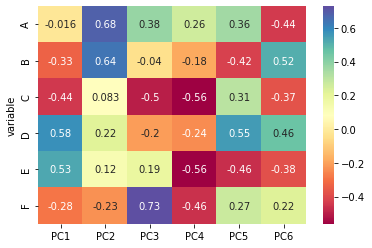

In [133]:
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [134]:
##selection des CP à retenir
#calcule des valeurs propre
pca_out.explained_variance_

array([2.63851242e+00, 1.83150713e+00, 1.08502351e+00, 8.73492981e-01,
       2.70875506e-05, 8.30518142e-06])

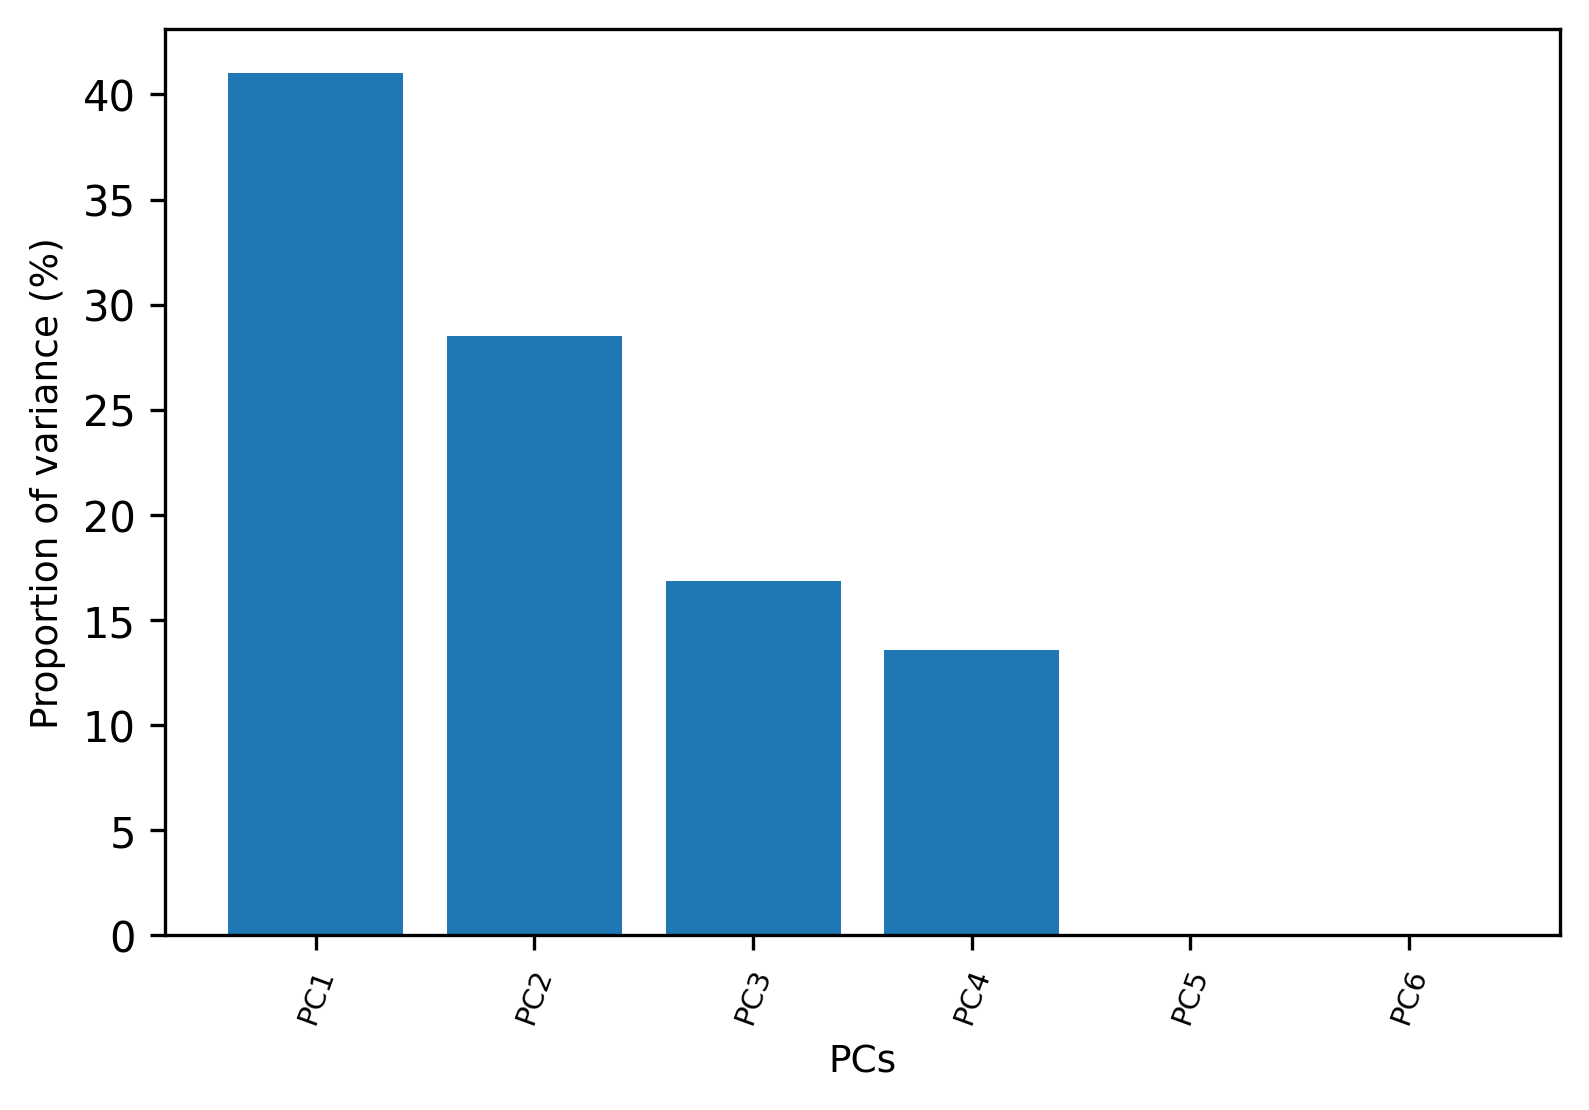

In [135]:
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])
Image(filename='screeplot.png') 

In [136]:
#visualisation des nuages des points en 2d et 3D
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))




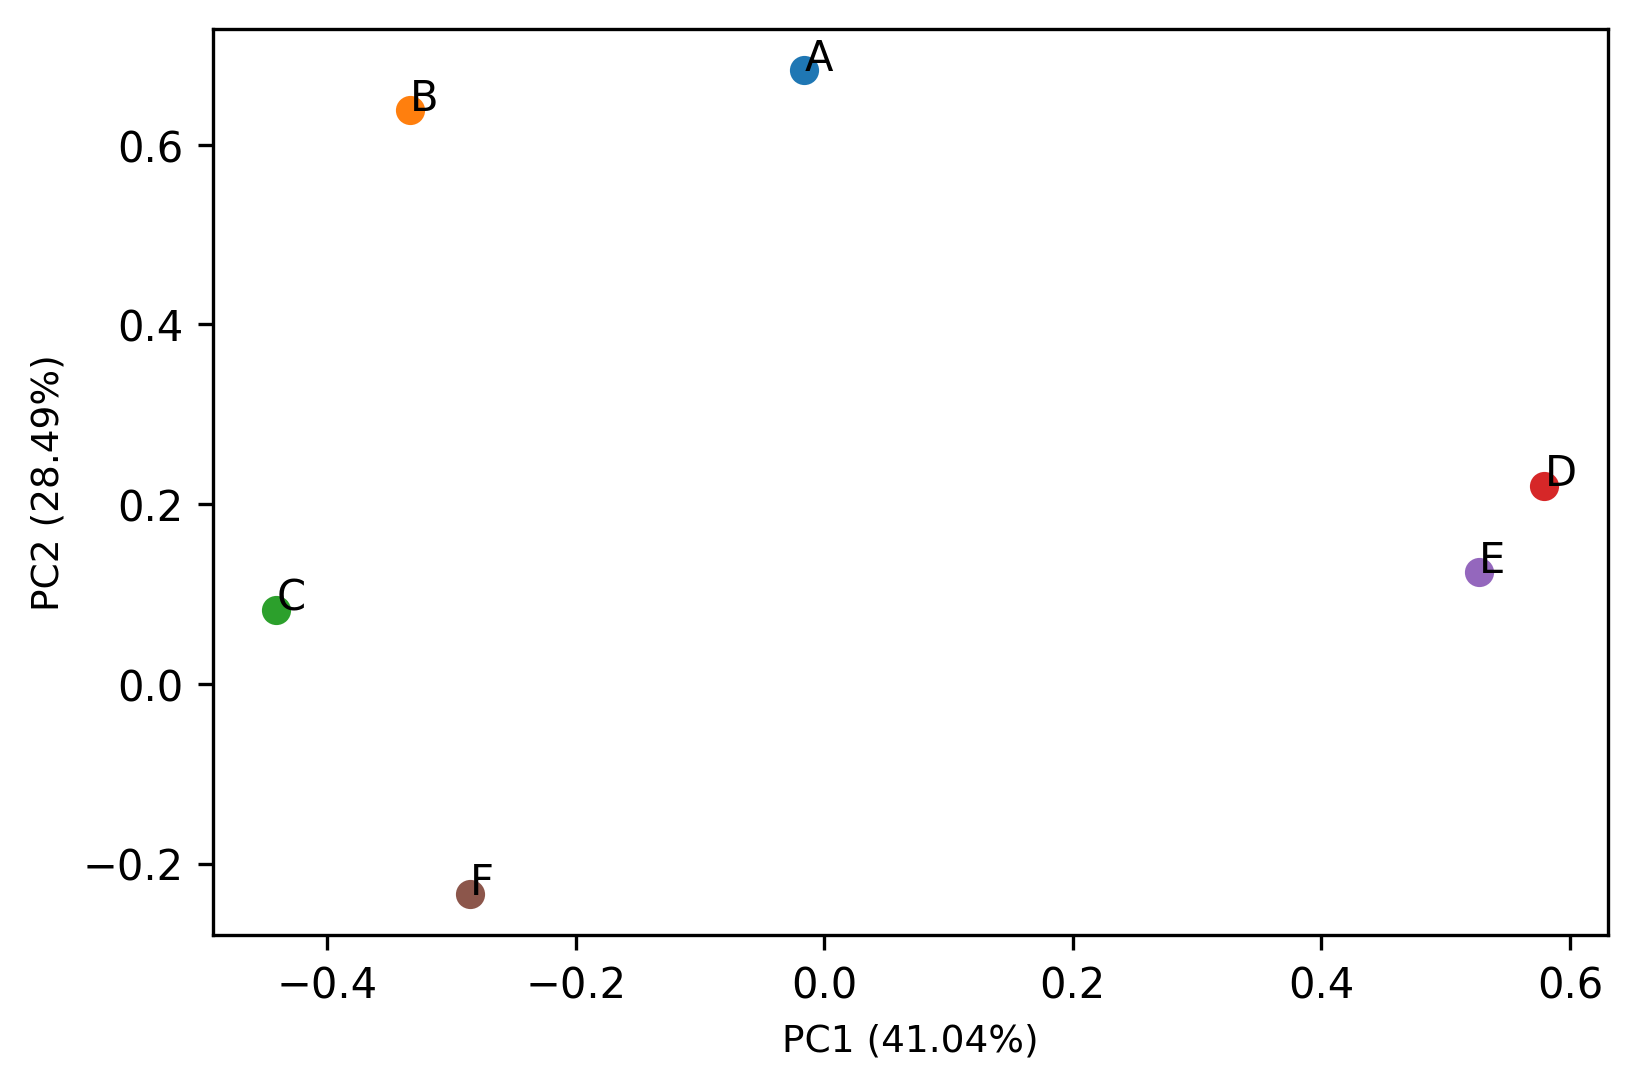

In [137]:
Image(filename='pcaplot_2d.png')


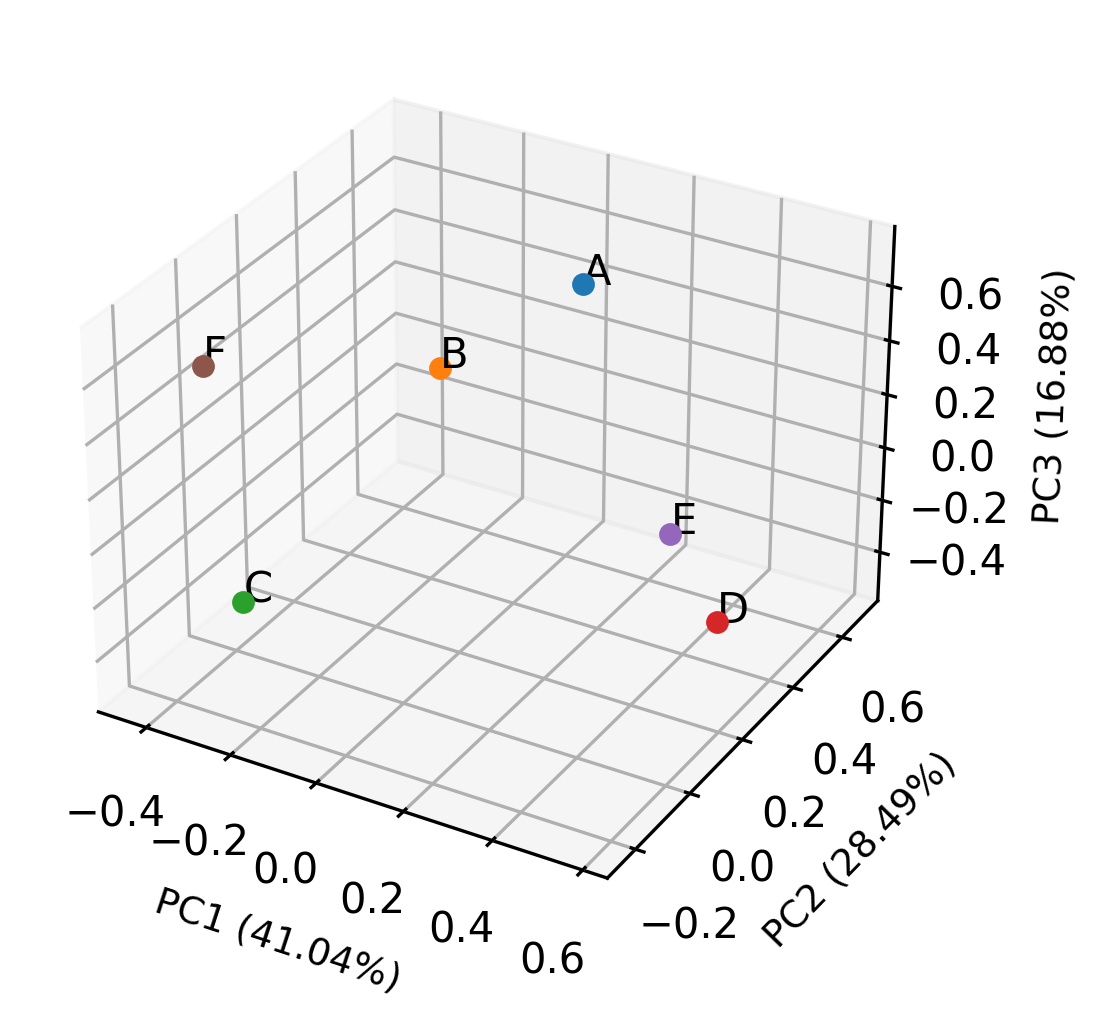

In [138]:
Image(filename='pcaplot_3d.png')

In [139]:
#visualisatoin des nuages des indevidus 
pca_scores = PCA().fit_transform(df_st)
print(pca_scores)

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

[[ 1.29265625e+00  1.63657476e+00  8.32291548e-01  5.31638553e-02
  -9.83914592e-04 -4.07492893e-03]
 [-1.26620049e+00 -2.57462485e-01  1.54772942e+00  1.80727364e+00
  -1.82990695e-03  2.72832522e-04]
 [ 1.58128584e+00  1.69945778e+00  1.16496312e+00 -6.88445642e-01
   2.20730348e-03 -1.33401487e-03]
 [ 7.33396792e-01  1.03811626e+00 -1.09002330e+00 -3.21162704e-01
   3.06100728e-04 -4.38862500e-03]
 [ 2.93839707e+00  5.16047770e-01 -9.20844538e-02  1.35083804e-01
  -5.75035423e-05  4.71585082e-03]
 [-1.13427167e+00 -2.43774598e+00 -2.93854692e-01 -1.73877738e+00
  -1.09068655e-03 -1.35008446e-03]
 [-2.91947916e+00  2.47797425e+00 -6.71585828e-01 -6.10599757e-01
  -1.01288289e-02  3.35303614e-03]
 [-2.30249506e+00 -6.80928171e-01  6.72914996e-01  8.67311636e-01
   5.89792042e-04 -3.64602428e-03]
 [ 4.85665493e-01 -1.39672345e+00 -1.56159499e-01  8.66112230e-01
  -2.90102620e-03  3.57689104e-03]
 [-3.43126188e-01 -5.77054440e-01 -2.55674624e-01 -3.64355076e-01
  -1.48232524e-03 -1.4580

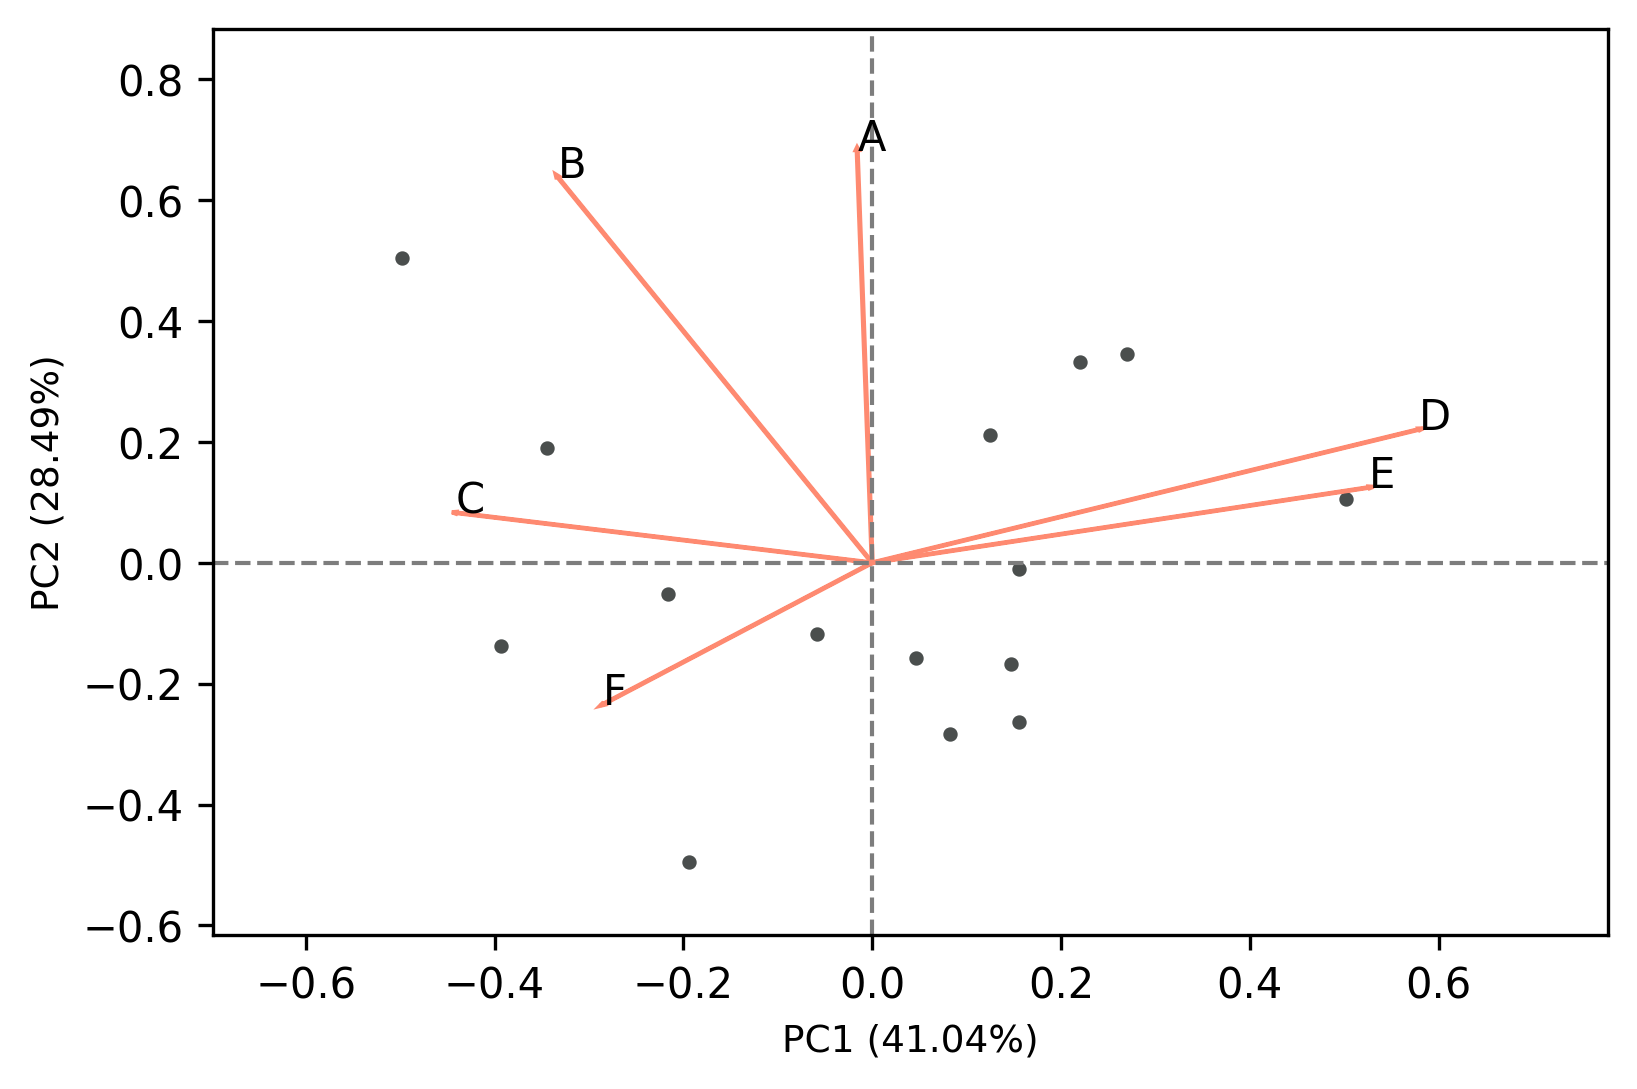

In [140]:
Image(filename='biplot_2d.png')

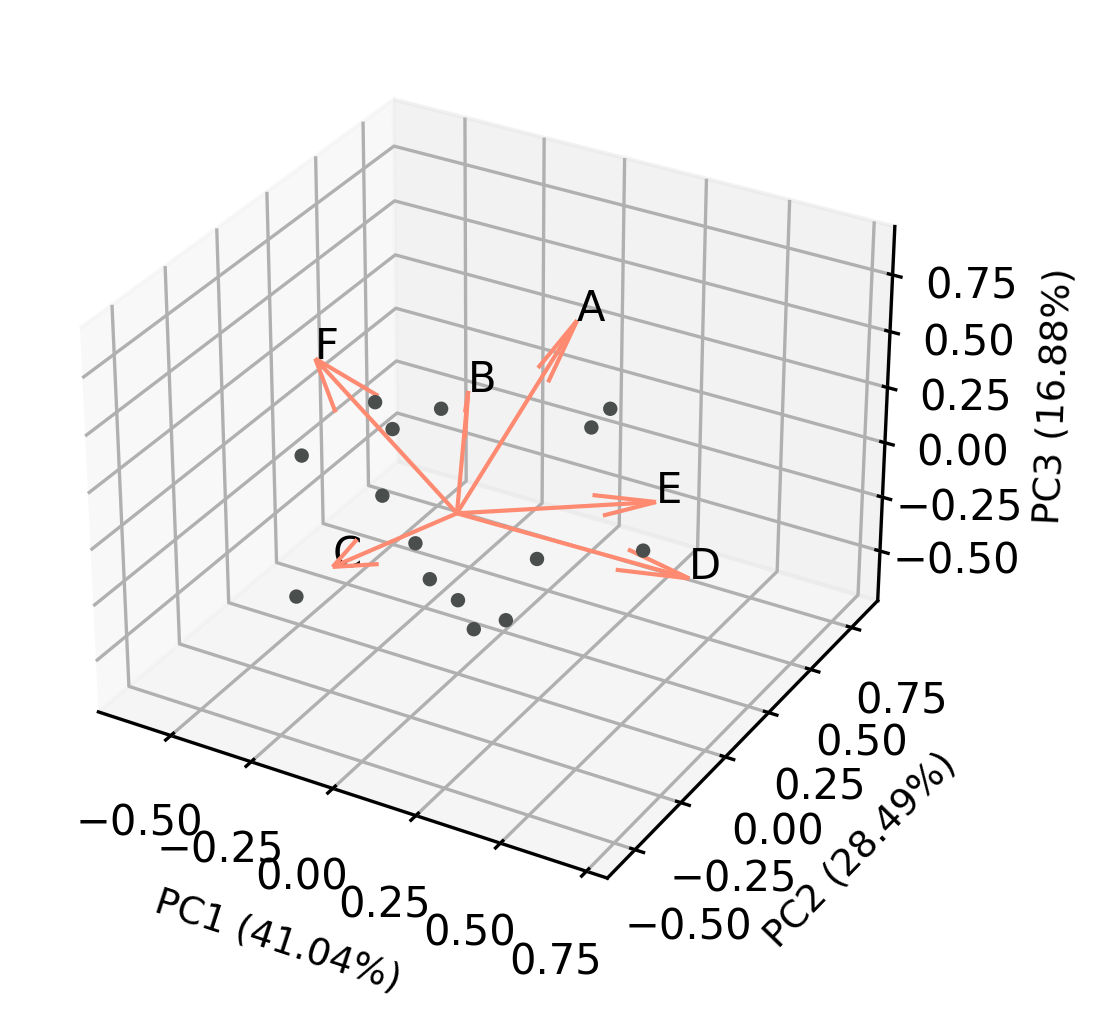

In [141]:
Image(filename='biplot_3d.png')

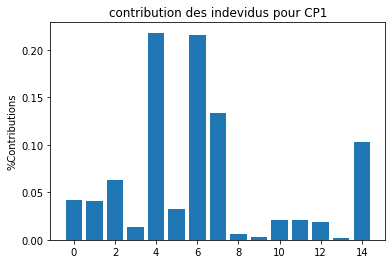

In [167]:
contD1_list = list()
contD1= pca_scores.T[0]

for cont in contD1:
    contD1_list.append((math.pow(cont, 2)/pca_out.explained_variance_[0])*(1/15))
    
plt.bar(df.index.values, contD1_list , align='center')
 
plt.title('contribution des indevidus pour CP1')
plt.ylabel('%Contributions')
 
plt.show() 

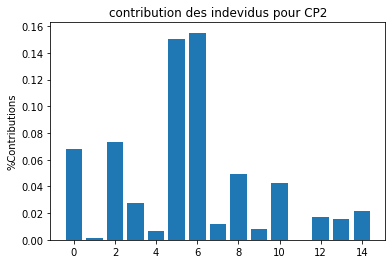

In [168]:
contD1_list = list()
contD1= pca_scores.T[1]

for cont in contD1:
    contD1_list.append((math.pow(cont, 2)/pca_out.explained_variance_[0])*(1/15))
    
    
plt.bar(df.index.values, contD1_list , align='center')
 
plt.title('contribution des indevidus pour CP2')
plt.ylabel('%Contributions')
 
plt.show() 